In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

In [2]:
%matplotlib inline

In [3]:
file_path = "Series.xlsx"

In [4]:
df = pd.read_excel(file_path)

In [5]:
df.head()

,Time,Value
0,1,50
1,2,120
2,3,-25
3,4,31
4,5,94


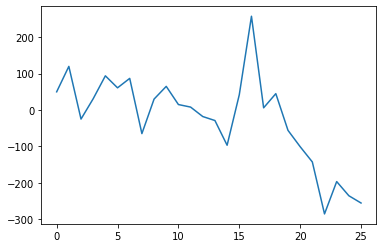

In [6]:
plt.plot(df["Value"])

In [7]:
X = df["Value"].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: -1.743415
p-value: 0.408894
Critical Values:
	1%: -3.724
	5%: -2.986
	10%: -2.633
Failed to Reject Ho - Time Series is Non-Stationary


### rolling mean

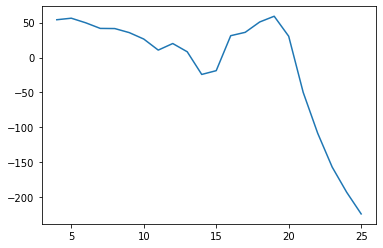

In [8]:
df.Value.rolling(window=5).mean().plot()

In [9]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

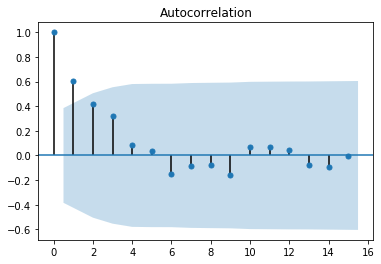

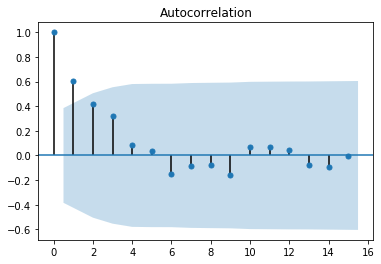

In [10]:
plot_acf(df.Value)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


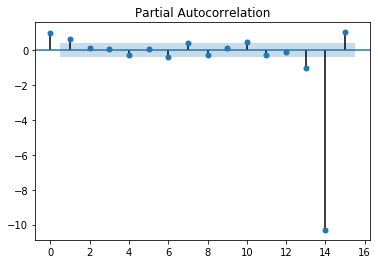

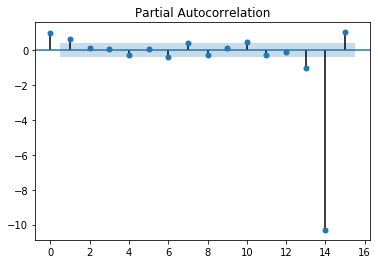

In [11]:
plot_pacf(df.Value)

In [12]:
df['Valud'] = df['Value'] - df['Value'].shift(1)

In [13]:
df.head()

,Time,Value,Valud
0,1,50,NaN
1,2,120,70.0
2,3,-25,-145.0
3,4,31,56.0
4,5,94,63.0


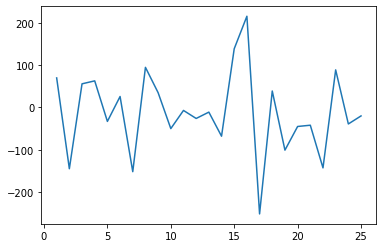

In [14]:
df.Valud.plot()

In [15]:
# Create transformation columns
import numpy as np

# Calculate the log 
df['Vallog'] = np.log(df.Value)

# Calculate the square root 
#trainingdata['adj_sqrt'] = np.sqrt(trainingdata['#Passengers'])

# Calculate the cubed root 
#trainingdata['adj_cbrt'] = np.cbrt(trainingdata['#Passengers'])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


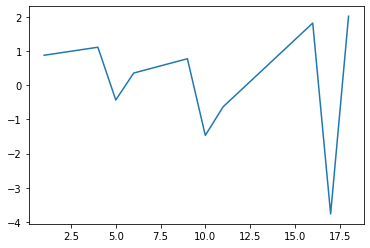

In [16]:
df['Vallogdiff'] = df['Vallog'] - df['Vallog'].shift(1)
df['Vallogdiff'].dropna().plot()

In [17]:
df['MA'] = df['Value'].rolling(window = 30).mean()

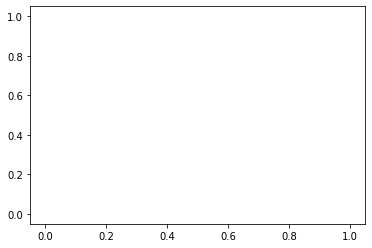

In [18]:
df.MA.plot()

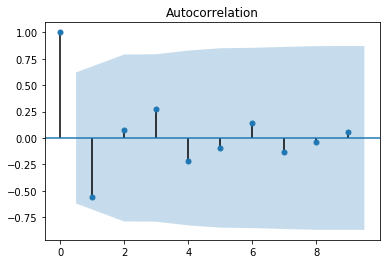

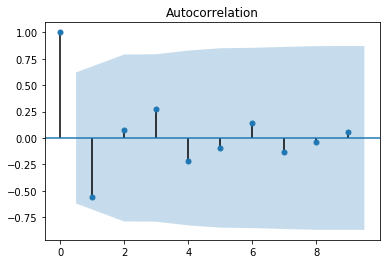

In [19]:
plot_acf(df.Vallogdiff.dropna())

In [20]:
df["Diff_Value"] = df["Value"].diff()

In [21]:
diff_values = df["Diff_Value"].values
Y = diff_values[~np.isnan(diff_values)]

In [22]:
ts_values_orig = df["Value"].values
ts_values = ts_values_orig[:-1]

In [23]:
X = sm.add_constant(ts_values)

In [24]:
model = sm.OLS(Y,X)
results = model.fit()

In [25]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     3.039
Date:                Sat, 06 Nov 2021   Prob (F-statistic):             0.0946
Time:                        16:50:59   Log-Likelihood:                -148.93
No. Observations:                  25   AIC:                             301.9
Df Residuals:                      23   BIC:                             304.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -16.2489     19.640     -0.827      0.4

In [26]:
results.tvalues[1]

-1.7434145361492948

In [27]:
df

,Time,Value,Valud,Vallog,Vallogdiff,MA,Diff_Value
0,1,50,NaN,3.912023,NaN,NaN,NaN
1,2,120,70.0,4.787492,0.875469,NaN,70.0
2,3,-25,-145.0,NaN,NaN,NaN,-145.0
3,4,31,56.0,3.433987,NaN,NaN,56.0
4,5,94,63.0,4.543295,1.109308,NaN,63.0
5,6,61,-33.0,4.110874,-0.432421,NaN,-33.0
6,7,87,26.0,4.465908,0.355034,NaN,26.0
7,8,-65,-152.0,NaN,NaN,NaN,-152.0
8,9,30,95.0,3.401197,NaN,NaN,95.0
9,10,65,35.0,4.174387,0.773190,NaN,35.0
